In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\hp\Downloads\Country-data.csv")

In [3]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


<AxesSubplot:>

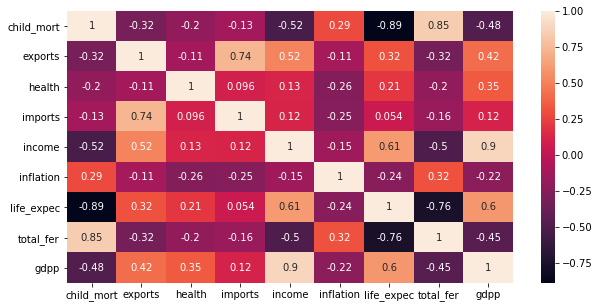

In [5]:
plt.figure(figsize= (10,5))
sns.heatmap(df.corr(),annot = True)

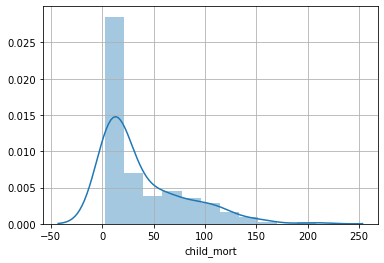

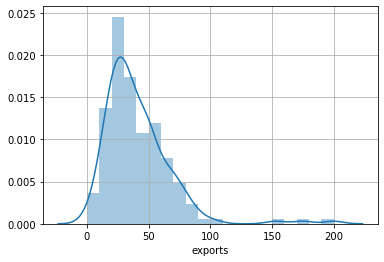

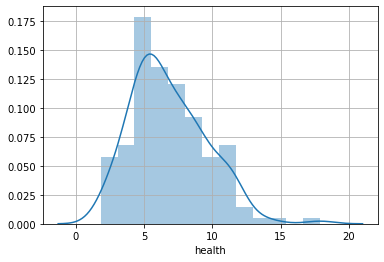

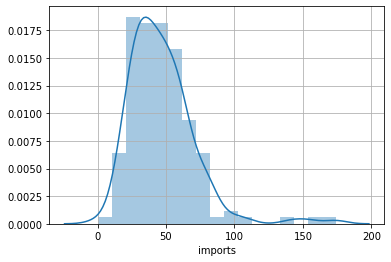

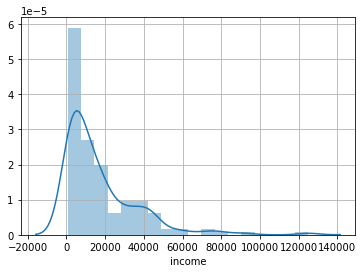

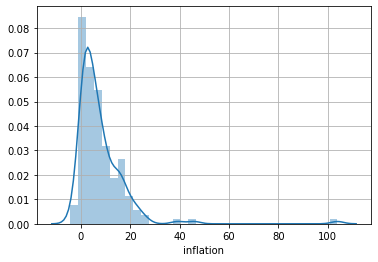

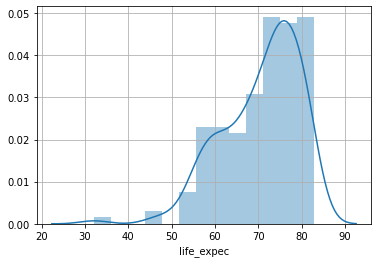

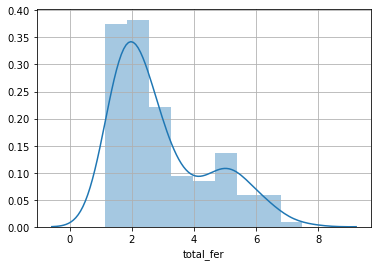

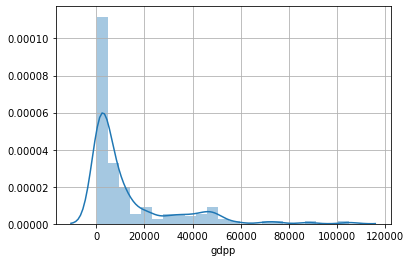

In [6]:
for i in df.columns[1:]:
    sns.distplot(df[i])
    plt.grid(True)
    plt.show();

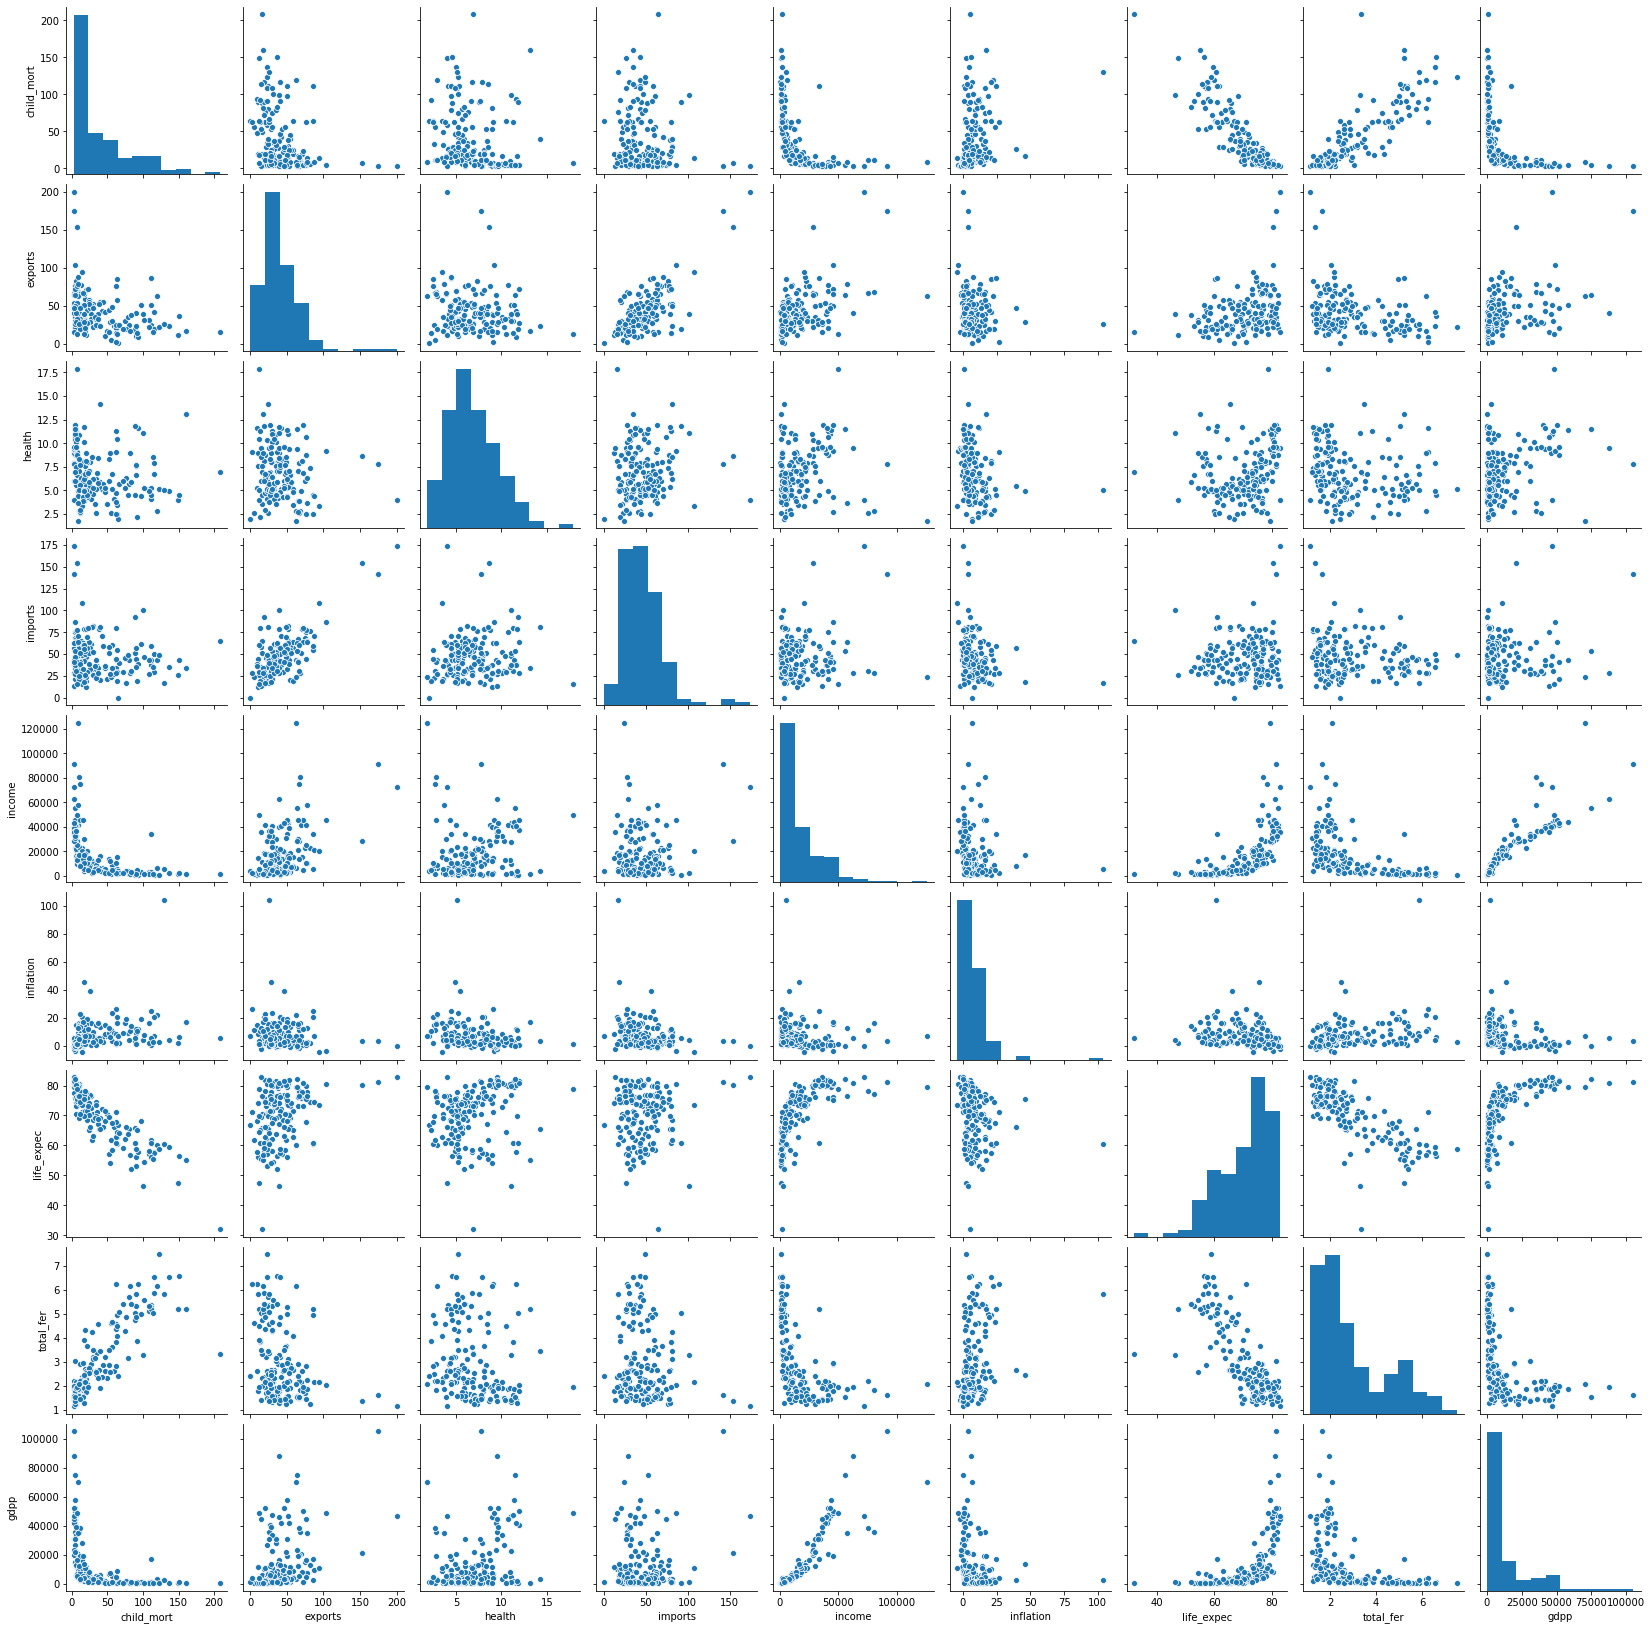

In [7]:
sns.pairplot(df)

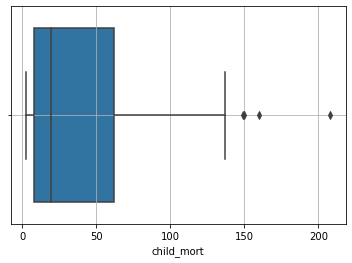

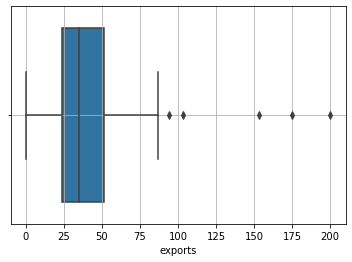

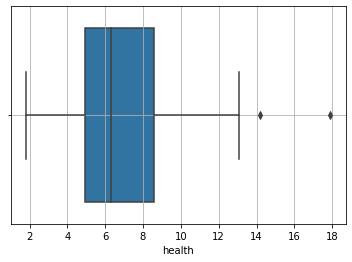

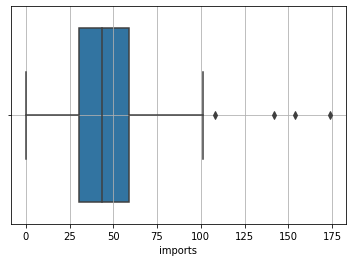

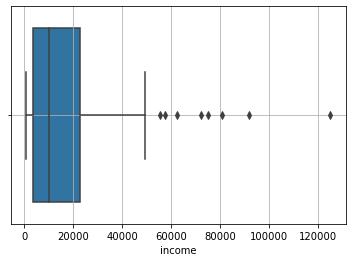

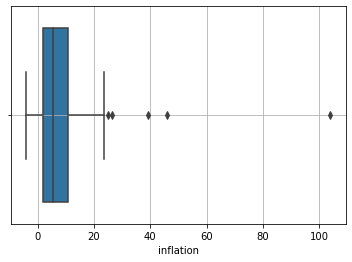

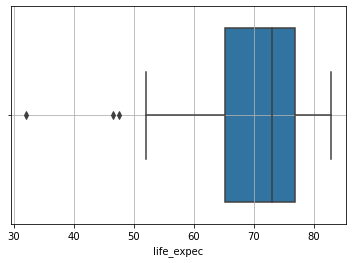

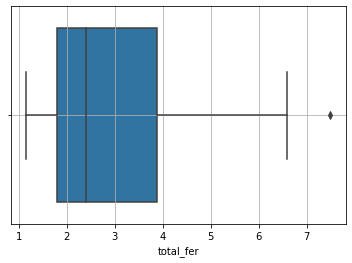

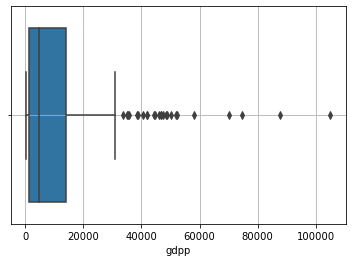

In [8]:
for col in df.columns[1:]:
    sns.boxplot(df[col])
    plt.grid(True)
    plt.show();

In [9]:
df1 = df.drop('country',axis = 1)

In [10]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
df2 = std.fit_transform(df1)

In [11]:
df2

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [12]:
from sklearn.cluster import KMeans

In [13]:
wcss = []

for i in range(1,20):
    kmean = KMeans(n_clusters = i , init = 'k-means++', random_state = 0)
    kmean.fit(df2)
    wcss.append(kmean.inertia_)

In [14]:
wcss

[1503.0000000000002,
 1050.2145582853307,
 831.424435208687,
 700.3917199643639,
 632.0401350265169,
 577.2077246996183,
 510.93723288700505,
 457.6657517891414,
 425.75173926286084,
 397.4879261099433,
 370.69612724474797,
 348.95882406814934,
 327.9210649920528,
 317.5974633104994,
 300.1301071347116,
 290.73399133244413,
 274.5486861196315,
 262.6558049594972,
 251.72060628706618]

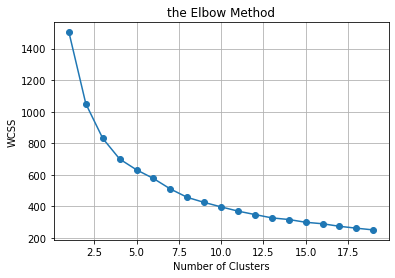

In [15]:
plt.plot(range(1,20),wcss,marker = 'o')
plt.title('the Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [16]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_hc = kmeans.fit_predict(df2)

df['cluster_kmeans'] = kmeans.labels_
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_kmeans
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


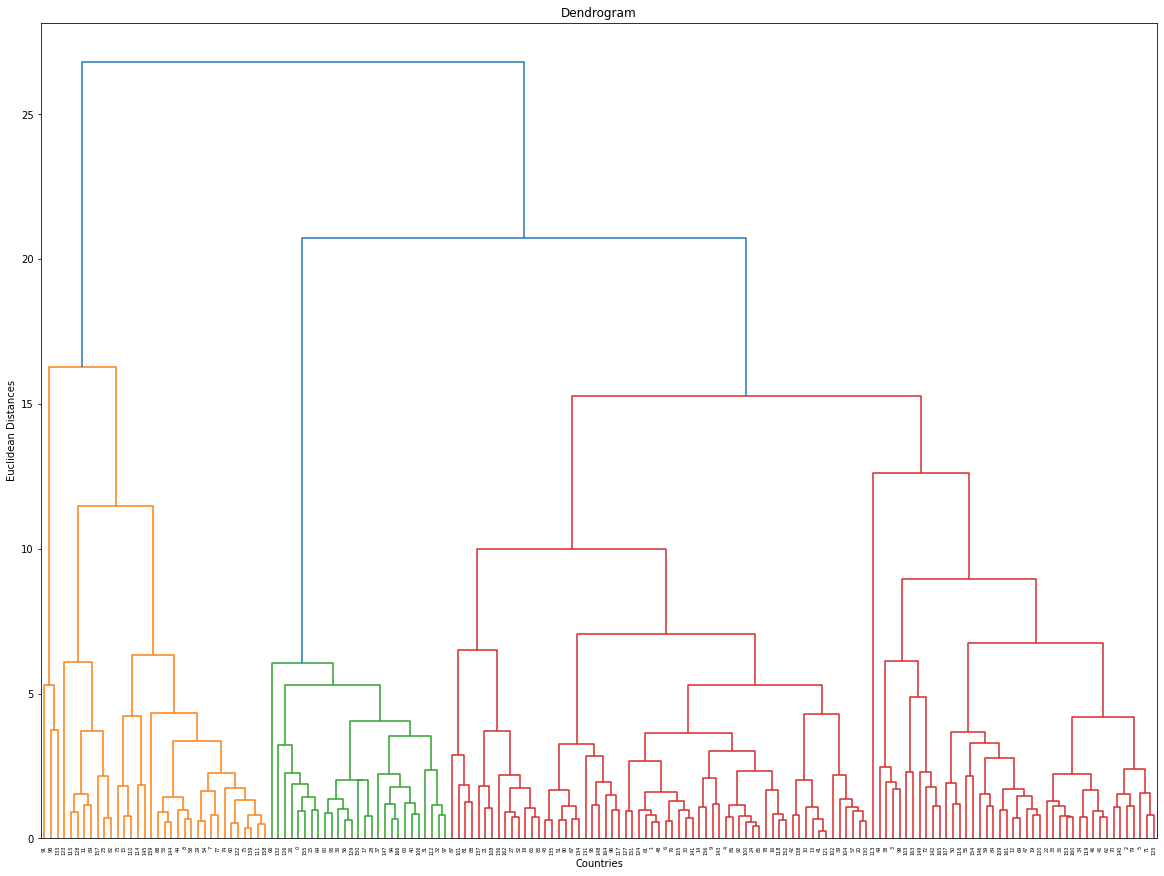

In [17]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize = (20,15))
dendrogram = sch.dendrogram(sch.linkage(df2, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean Distances')
plt.show()